In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set()

import os

import math
import cv2

In [3]:
# jupyter内での表示
def showimg(img):
    if len(img.shape) == 3:
        plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
        plt.show()
    elif len(img.shape)  == 2:
        plt.imshow(img,cmap='gray')
        plt.show()
    else:
        print("error")

■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■

In [4]:
# 分析対象の画像選択
imgNo = "025"

In [5]:
# フォルダ選択

path = "../"
folderlist = os.listdir(path)

for f in folderlist:
    if imgNo in f:
        rootfile = f

rootpath = "../" + str(rootfile)

print("今回の分析対象フォルダ")
print(rootpath)

今回の分析対象フォルダ
../DJI_0250_50


In [6]:
filelist = os.listdir(str(rootpath) + "/data")

paths = [str(rootpath) + "/data/" + filename for filename in filelist ]
paths

['../DJI_0250_50/data/DJI_0250_50.JPG',
 '../DJI_0250_50/data/DJI_0250_50_color.JPG',
 '../DJI_0250_50/data/DJI_0251_50.TIF',
 '../DJI_0250_50/data/DJI_0252_50.TIF',
 '../DJI_0250_50/data/DJI_0253_50.TIF',
 '../DJI_0250_50/data/DJI_0254_50.TIF',
 '../DJI_0250_50/data/DJI_0255_50.TIF']

In [7]:
maskpath = str(rootpath) + "/masks"
maskfilelist = os.listdir(maskpath)
maskpathlist = [str(rootpath) + "/masks/"+ str(filename) for filename in maskfilelist]

maskfiles = []
maskpaths = []

for f, p in zip(maskfilelist, maskpathlist):
    maskfiles.append(f)
    maskpaths.append(p)
print(maskfiles)
print(maskpaths)

['DJI_0250_50_mask.png', 'mask_4_e4_c5_o5.png', 'mask_processed_2_c5_o5.png', 'z_DJI_0250_50_mask.xcf']
['../DJI_0250_50/masks/DJI_0250_50_mask.png', '../DJI_0250_50/masks/mask_4_e4_c5_o5.png', '../DJI_0250_50/masks/mask_processed_2_c5_o5.png', '../DJI_0250_50/masks/z_DJI_0250_50_mask.xcf']


■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■

In [13]:
# 読み込み
imgnameset = ["color2gray","color","mask","B","G","R","REDEDGE","NIR"]
color2gray = cv2.imread(paths[0],0)
color      = cv2.imread(paths[1])
BLUE       = cv2.imread(paths[2],0) 
GREEN      = cv2.imread(paths[3],0) 
RED        = cv2.imread(paths[4],0) 
REDEDGE    = cv2.imread(paths[5],0) 
NIR        = cv2.imread(paths[6],0) 

mask       = cv2.imread(maskpaths[1],0)

In [14]:
# 正規化

max      = 255 # 最大輝度値

normb    = BLUE/max
normg    = GREEN/max
normr    = RED/max
normrg   = REDEDGE/max
normnir  = NIR/max

■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■

In [15]:
# 各指標の計算
dvi   = DVI(normr, normnir)
gi    = GI(normg, normr)
msavi = MSAVI(normr, normnir)
ndvi  = NDVI(normr, normnir)
ndgi  = NDGI(normg, normnir)
ndre  = NDRE(normr, normnir)
osavi = OSAVI(normr, normnir)
rgri  = RGRI(normg, normr)
rdvi  = RDVI(normr, normnir)
sr    = SR(normr, normnir)

VIlist = [dvi, gi, msavi, ndvi, ndgi, ndre, osavi, rgri, rdvi, sr]
VIname = ["DVI", "GI", "MSAVI", "NDVI", "NDGI", "NDRE", "OSAVI", "RGRI", "RDVI", "SR"]


C:\Users\Ryosuke\Pictures\mikan\arida_1223_2020\multispectral\whiteboard_ari\corrected_data_1 (zure_nashi)\functions\VI_function.py:82: RuntimeWarning: invalid value encountered in true_divide
  ndgi = (nir-green)/(nir+green)
C:\Users\Ryosuke\Pictures\mikan\arida_1223_2020\multispectral\whiteboard_ari\corrected_data_1 (zure_nashi)\functions\VI_function.py:112: RuntimeWarning: divide by zero encountered in true_divide
  rgri = red/green


■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■

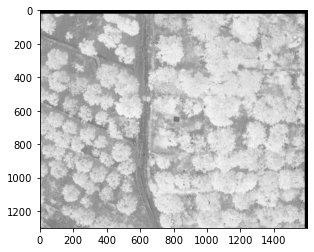

In [20]:
img_ndvi = ndvi * 255/ndvi.max()
showimg(img_ndvi)

In [21]:
cv2.imwrite(str(rootpath)+"/auto_segmentation/0_ndvi.png", img_ndvi)

True

In [22]:
# 二値化

threshold = 128

src = np.ones(img_ndvi.shape, dtype = "uint8")
src = src * 255
src = src*(img_ndvi >= threshold)

img_src = src

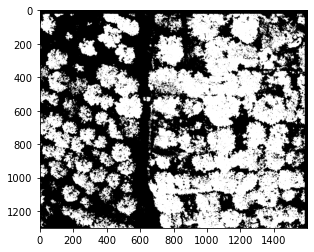

In [23]:
showimg(img_src)

In [25]:
# 記録
cv2.imwrite(str(rootpath)+"/auto_segmentation/0_ndvi_mask.png",img_src)

True

In [26]:

def opening(img_input, e, times):
    element4 = np.array([[0,1,0],[1,1,1],[0,1,0]], np.uint8)
    element8 = np.ones((3,3),np.uint8)
    
    if e == 4:
        img_tmp = cv2.erode(img_input, element4, iterations = times)
        img_output = cv2.dilate(img_tmp, element4, iterations = times)
    elif e == 8:
        img_tmp = cv2.erode(img_input, element8, iterations = times)
        img_output = cv2.dilate(img_tmp, element8, iterations = times)    
    return img_output

def closing(img_input, e, times):
    element4 = np.array([[0,1,0],[1,1,1],[0,1,0]], np.uint8)
    element8 = np.ones((3,3),np.uint8)
    
    if e == 4:
        img_tmp = cv2.dilate(img_input, element4, iterations = times)
        img_output = cv2.erode(img_tmp, element4, iterations = times)
    elif e == 8:
        img_tmp = cv2.dilate(img_input, element8, iterations = times)
        img_output = cv2.erode(img_tmp, element8, iterations = times)       
    return img_output

In [27]:
# カウンター
count = 0

In [31]:
# e = 4あたりがのぞましい．
# o は低めのほうがいい？
e = 4
o = 5
c = 5

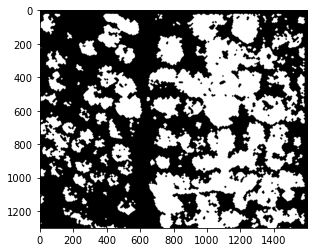

True

In [32]:
# opening → closing

count += 1

tmp = opening(img_src, e, o)
img_dst = closing(tmp, 4, c)

showimg(img_dst)
cv2.imwrite(str(rootpath) + "/auto_segmentation/mask"+"_o"+str(o)+"_c"+str(c)+"_e"+str(e)+"_"+str(count)+".png", img_dst)

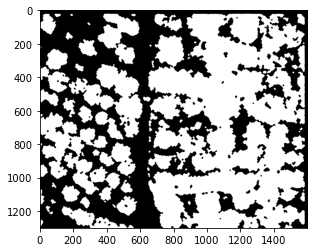

True

In [33]:
# closing → opening

count += 1

tmp = closing(img_src, e, c)
img_dst = opening(tmp, e, o)

showimg(img_dst)
cv2.imwrite(str(rootpath) + "/auto_segmentation/mask"+"_c"+str(c)+"_o"+str(o)+"_e"+str(e)+"_"+str(count)+".png", img_dst)
